In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Deze niet runnen
file_path = 'merged_global_education_world_happiness.csv'
df = pd.read_csv(file_path)

# Specify the columns to keep
columns_to_keep = [
    'Country',
    'OOSR_Lower_Secondary_Age_Male',
    'OOSR_Lower_Secondary_Age_Female',
    'OOSR_Upper_Secondary_Age_Male',
    'OOSR_Upper_Secondary_Age_Female',
    'Completion_Rate_Lower_Secondary_Male',
    'Completion_Rate_Lower_Secondary_Female',
    'Completion_Rate_Upper_Secondary_Male',
    'Completion_Rate_Upper_Secondary_Female',
    'Lower_Secondary_End_Proficiency_Reading',
    'Lower_Secondary_End_Proficiency_Math',
    'Ladder score',
    'Logged GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices'
]

# Keep only the specified columns
filtered_df = df[columns_to_keep]

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv('filtered_global_education_world_happiness.csv', index=False)

print("Filtered CSV file has been created successfully.")

In [ ]:
# Deze niet runnen

import pandas as pd

# Read the CSV file
file_path = 'merged_global_education_world_happiness.csv'
df = pd.read_csv(file_path)

# Specify the columns to keep initially (before averaging)
columns_to_keep = [
    'Country',
    'OOSR_Lower_Secondary_Age_Male',
    'OOSR_Lower_Secondary_Age_Female',
    'OOSR_Upper_Secondary_Age_Male',
    'OOSR_Upper_Secondary_Age_Female',
    'Completion_Rate_Lower_Secondary_Male',
    'Completion_Rate_Lower_Secondary_Female',
    'Completion_Rate_Upper_Secondary_Male',
    'Completion_Rate_Upper_Secondary_Female',
    'Lower_Secondary_End_Proficiency_Reading',
    'Lower_Secondary_End_Proficiency_Math',
    'Ladder score',
    'Logged GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices'
]

# Keep only the specified columns
filtered_df = df[columns_to_keep]

# Calculate the average of the specified pairs of columns and create new columns
filtered_df['Average_OOSR_Female'] = filtered_df[['OOSR_Lower_Secondary_Age_Female', 'OOSR_Upper_Secondary_Age_Female']].mean(axis=1).astype(int)
filtered_df['Average_OOSR_Male'] = filtered_df[['OOSR_Lower_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Male']].mean(axis=1).astype(int)
filtered_df['Average_Completion_Rate_Male'] = filtered_df[['Completion_Rate_Lower_Secondary_Male', 'Completion_Rate_Upper_Secondary_Male']].mean(axis=1).astype(int)
filtered_df['Average_Completion_Rate_Female'] = filtered_df[['Completion_Rate_Lower_Secondary_Female', 'Completion_Rate_Upper_Secondary_Female']].mean(axis=1).astype(int)

# Drop the original columns that were averaged
filtered_df = filtered_df.drop(columns=[
    'OOSR_Lower_Secondary_Age_Male',
    'OOSR_Lower_Secondary_Age_Female',
    'OOSR_Upper_Secondary_Age_Male',
    'OOSR_Upper_Secondary_Age_Female',
    'Completion_Rate_Lower_Secondary_Male',
    'Completion_Rate_Lower_Secondary_Female',
    'Completion_Rate_Upper_Secondary_Male',
    'Completion_Rate_Upper_Secondary_Female'
])

# Reorder the columns to include the new average columns in a logical order
final_columns = [
    'Country',
    'Average_OOSR_Male',
    'Average_OOSR_Female',
    'Average_Completion_Rate_Male',
    'Average_Completion_Rate_Female',
    'Lower_Secondary_End_Proficiency_Reading',
    'Lower_Secondary_End_Proficiency_Math',
    'Ladder score',
    'Logged GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices'
]

# Ensure the DataFrame is in the correct order
filtered_df = filtered_df[final_columns]

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv('filtered_global_education_world_happiness_average.csv', index=False)

print("Filtered CSV file with the average columns has been created successfully.")


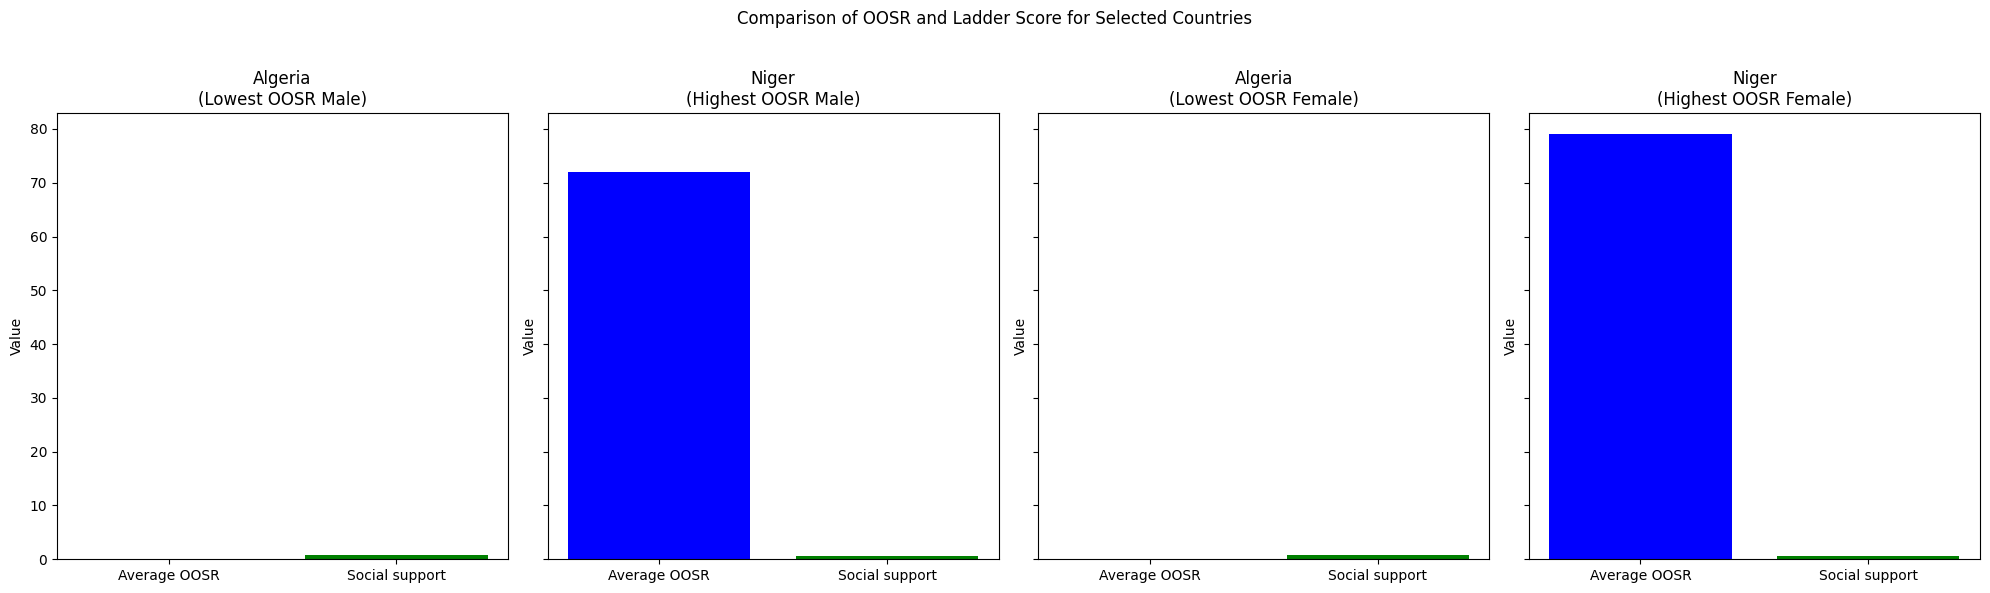

In [4]:
# Load the filtered CSV file
file_path = "filtered_global_education_world_happiness_average.csv"
filtered_df = pd.read_csv(file_path)

# Check if the 'country' column exists
if 'Country' not in filtered_df.columns:
    raise KeyError("The 'country' column is not present in the CSV file.")

# Ensure all necessary columns are present
required_columns = [
    'Country', 'Average_OOSR_Male', 'Average_OOSR_Female', 'Social support'
]

missing_columns = [col for col in required_columns if col not in filtered_df.columns]
if missing_columns:
    raise KeyError(f"The following required columns are missing from the CSV file: {missing_columns}")

# Find the countries with the lowest and highest average OOSR Male and Female
lowest_oosr_male_country = filtered_df.loc[filtered_df['Average_OOSR_Male'].idxmin()]
highest_oosr_male_country = filtered_df.loc[filtered_df['Average_OOSR_Male'].idxmax()]
lowest_oosr_female_country = filtered_df.loc[filtered_df['Average_OOSR_Female'].idxmin()]
highest_oosr_female_country = filtered_df.loc[filtered_df['Average_OOSR_Female'].idxmax()]

# Prepare the data for plotting
countries = [lowest_oosr_male_country, highest_oosr_male_country, lowest_oosr_female_country, highest_oosr_female_country]
labels = ['Lowest OOSR Male', 'Highest OOSR Male', 'Lowest OOSR Female', 'Highest OOSR Female']

# Plot the data
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

for ax, country, label in zip(axes, countries, labels):
    avg_oosr = country['Average_OOSR_Male'] if 'Male' in label else country['Average_OOSR_Female']
    social_support = country['Social support']
    ax.bar(['Average OOSR', 'Social support'], [avg_oosr, social_support], color=['blue', 'green'])
    ax.set_title(f'{country["Country"]}\n({label})')
    ax.set_ylabel('Value')

fig.suptitle('Comparison of OOSR and Ladder Score for Selected Countries')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
